### Background and Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### Objective:

Identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Data

- Sl_No --- Serial Number 
- Customer Key --- Customer unique Key
- Avg_Credit_Limit --- Average Credit Limit
- Total_Credit_Cards --- Number of Credit Cards they have
- Total_visits_bank --- Number of times they visited the bank
- Total_visits_online  --- Number of times they visited the website online
- Total_calls_made --- Number of times they made a call

In [76]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set_theme(style='darkgrid')

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

### Load and view the dataset

In [77]:
#Loading the dataset
data=pd.read_excel('C://Users/Owner/Desktop/DSBA/unsupervised project/Credit Card Customer Data.xlsx')

In [78]:
df=data.copy()

In [79]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- There are total of 7 columns and 660 observations in the dataset
- There is no missing value in the dataset.
- There is only int datatype in the dataset.

In [81]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

Customer Key is a unique ID given to every customers in the database. There are 655 unique customer keys in the day instead of 660 customer keys as expected, this may be an error when inputting the data in database or the the remaining 5 customer keys might be duplicate. I will ignore (not drop ,for now) the "Customer Key" column moving forward in my analysis.

In [82]:
df.drop('Sl_No', axis=1,inplace=True) #I wont need Sl_No for analysis, so I will drop this column

In [83]:
# lets check duplicate observations
df.duplicated().sum()

0

No duplicate observation

#### Summary of the data

In [84]:
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


- The minimum Avg_Credit_limit is 3000 with a mean of 34574. 75% or fewer of the customers have Avg_Credit_limit of 48000.
- Every customer has at least 1 credit card with 50% or fewer of the customers having 5 credit cards.10 credit cards is the max.
- Average total visit to the bank is about 2. Some customers have never visited the bank.
- Average total visit to the bank is about 3. Some customers have never visited the bank online. 
- Some customers have never made any call to the bank.Average total calls made to the bank is about 4.

### EDA

#### Univariate Analysis

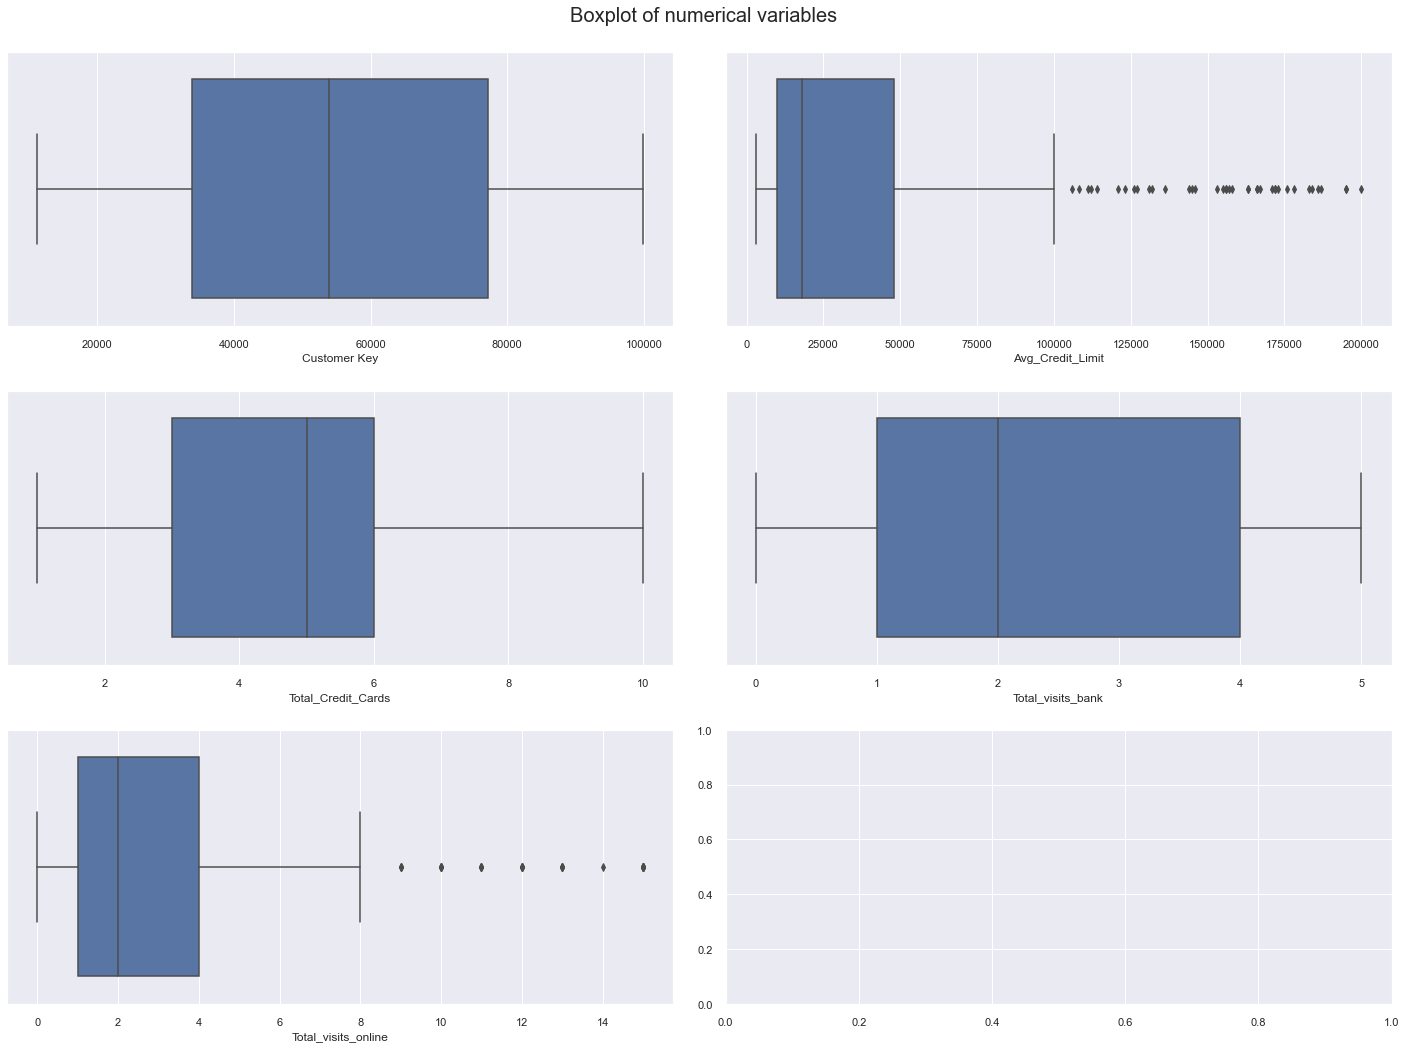

In [85]:
# selecting numerical columns
all_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.boxplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.boxplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='Total_calls_made'>

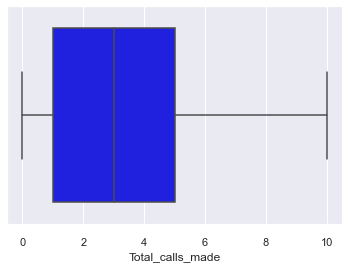

In [86]:
sns.boxplot(df['Total_calls_made'] ,color='blue')

- There are outliers in Avg_Credit_limit and Total_Visits_online, but these outliers seem real.

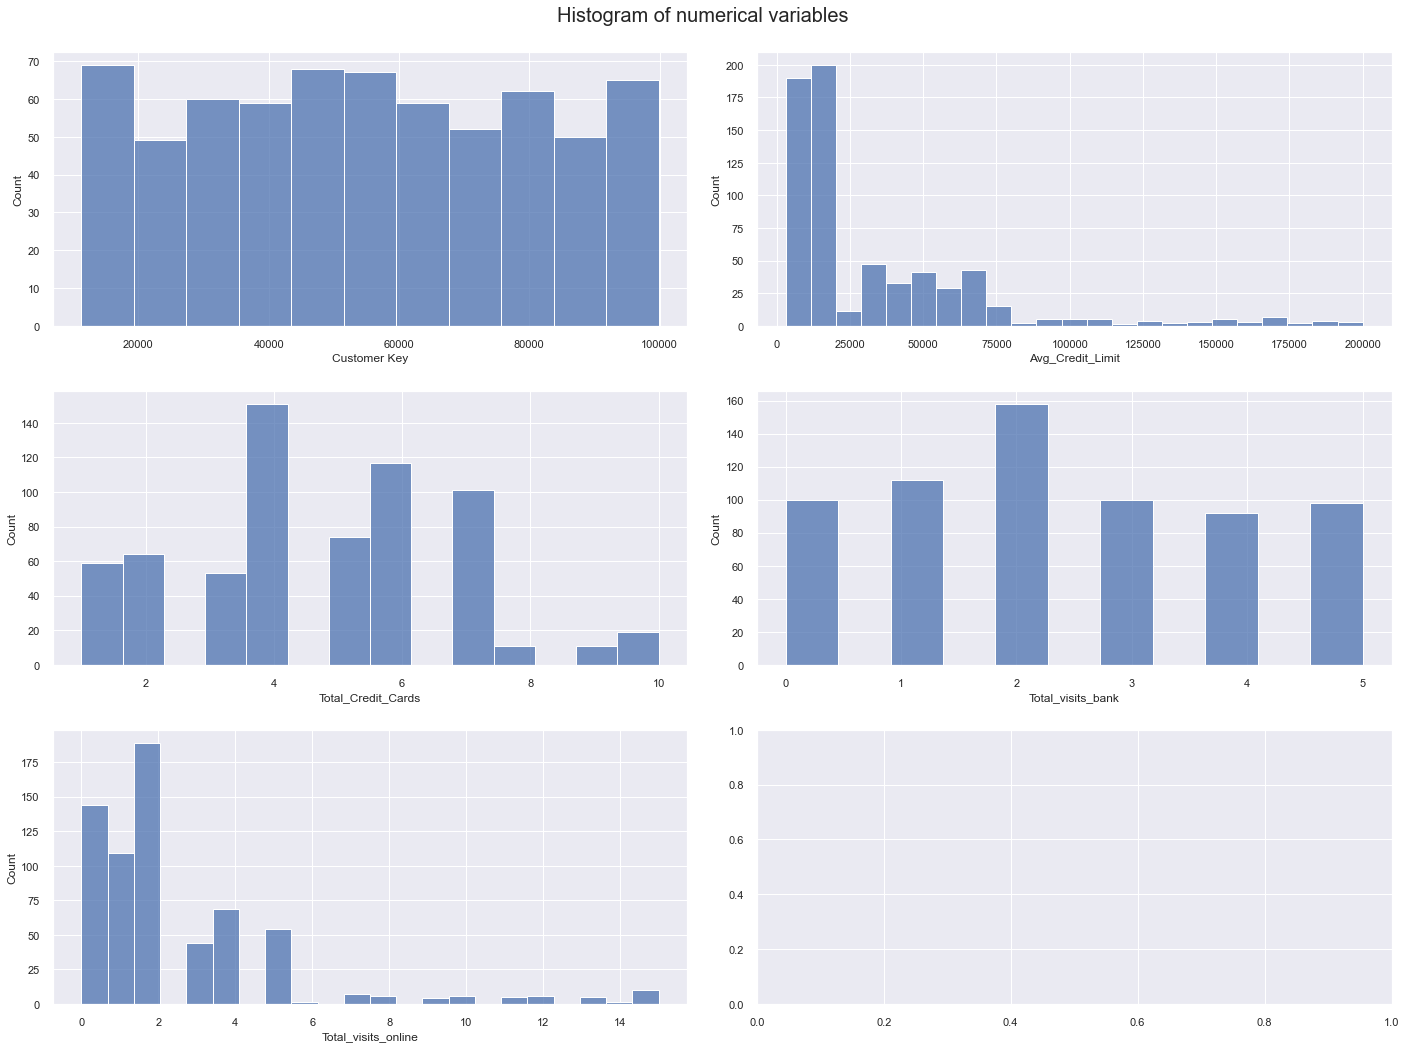

In [87]:
# select numerical columns
all_col = df.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.histplot(ax=axes[ii][0],x=df[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.histplot(ax=axes[ii][1],x=df[all_col[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='Total_calls_made', ylabel='Density'>

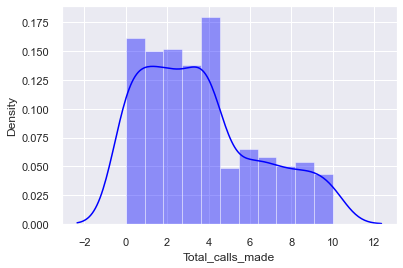

In [88]:
sns.distplot(df['Total_calls_made'] ,color='blue')

- The Avg_Credit_limit and Total_Visits_online are right skewed.
- Total_visits_Bank seems normally distributed.

#### Bivariate Analysis

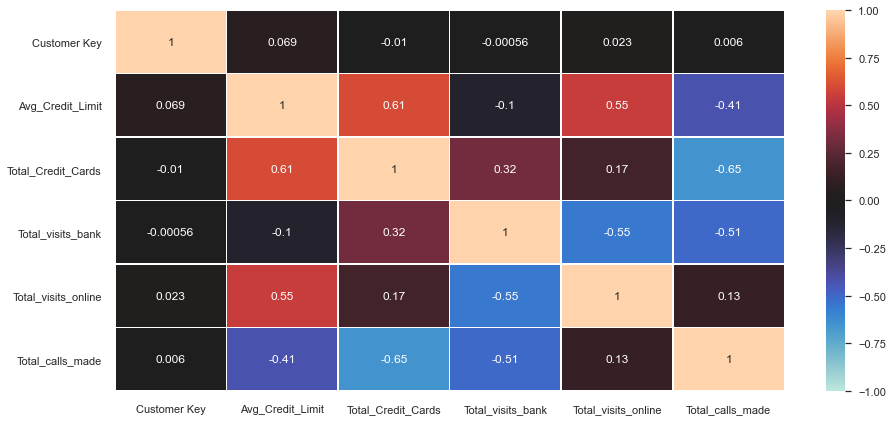

In [89]:
plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)            

plt.show()

- There is positive correlation between total credit card and avg credit limit , also between total visit online and ave credit limit.
- There is negative correlation between total credit card and total calls made , also between total visit bank and total calls made.

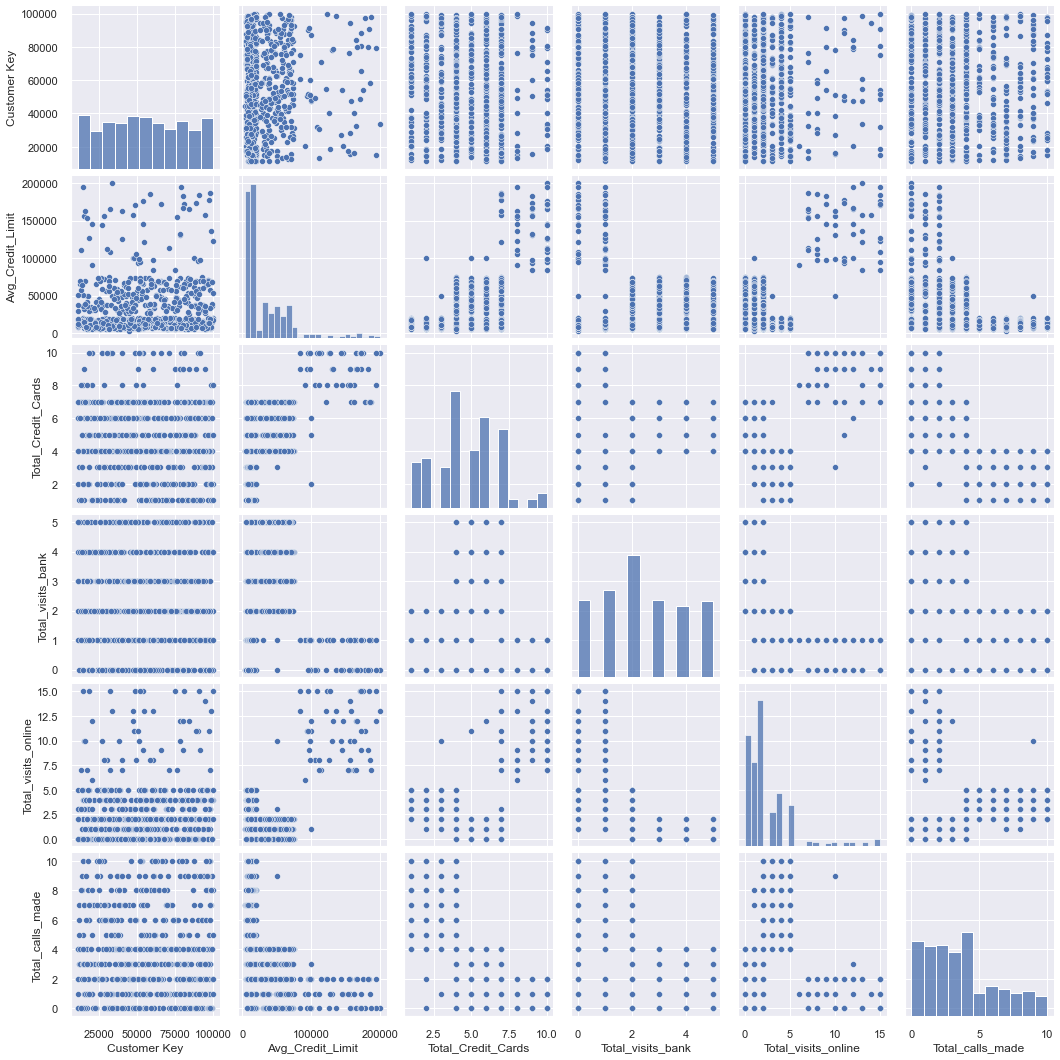

In [90]:
sns.pairplot(data=df)

- Not much is obvious from the above pairplot.

#### Data pre-processing

In [91]:
all_col

['Customer Key',
 'Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [92]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)  

In [93]:
# Creating a dataframe of the above results
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

In [94]:
subset_scaled_df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [95]:
subset_scaled_df.drop('Customer Key', axis=1, inplace=True) #At this point,I wont need Customer Key for analysis

In [96]:
subset_all_col = list(subset_scaled_df.columns)

### Applying K-means clustering algorithms

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9905080751956661
Number of Clusters: 6 	Average Distortion: 0.9429789712808515
Number of Clusters: 7 	Average Distortion: 0.9093991915419353
Number of Clusters: 8 	Average Distortion: 0.8924764244312386


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

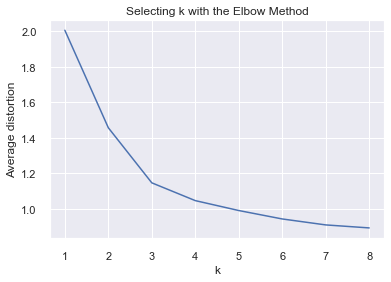

In [97]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**Appropriate k seems to be 3 or 4.**

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2726898791817692)
For n_clusters = 6, silhouette score is 0.2553480159463278)
For n_clusters = 7, silhouette score is 0.24847787091758058)
For n_clusters = 8, silhouette score is 0.22784683249957977)
For n_clusters = 9, silhouette score is 0.21967533864319705)


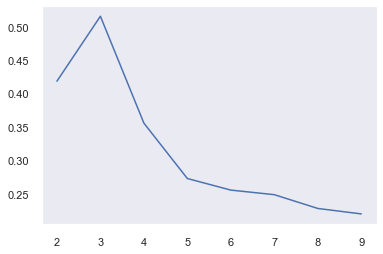

In [98]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

**Silhouette score for 3 is high, so we will choose 3 as value of k.**

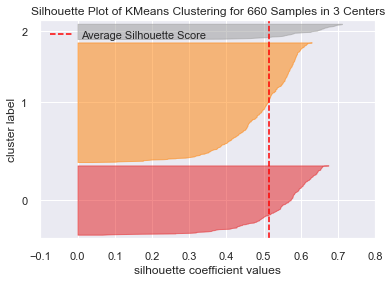

In [99]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show();

In [100]:
# lets us take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [101]:
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [102]:
df.groupby('K_means_segments').count()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,,
0,386,386,386,386,386,386
1,224,224,224,224,224,224
2,50,50,50,50,50,50


In [103]:
cluster_profile = df.groupby('K_means_segments').mean()

In [104]:
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Total_Credit_Cards'].count().values

In [105]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,,
0,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50


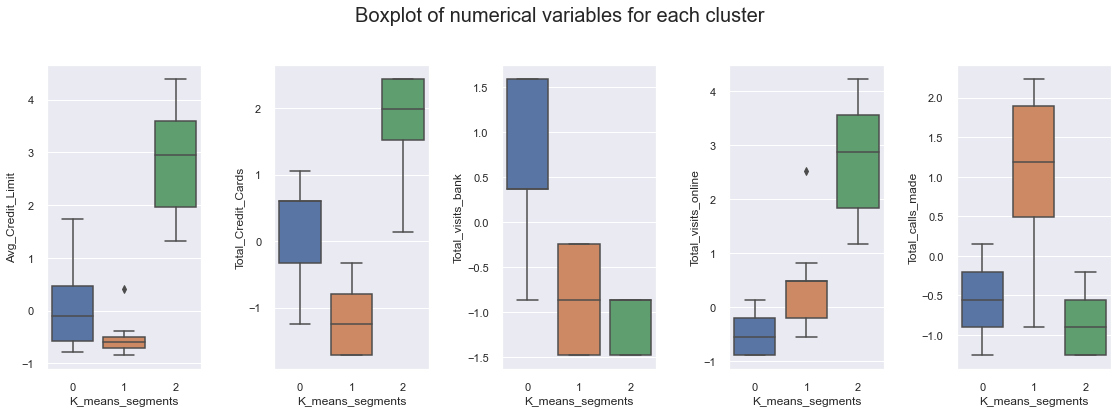

In [106]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[subset_all_col[counter]],x=subset_scaled_df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

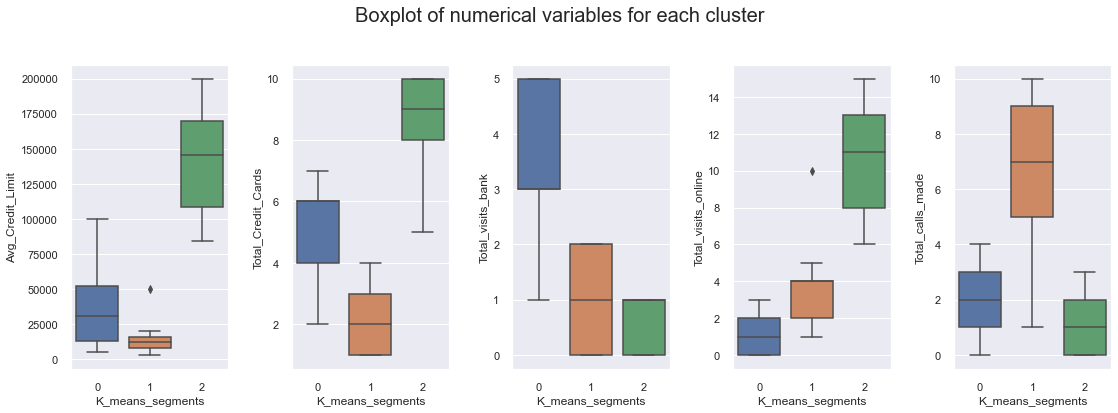

In [116]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[subset_all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### Insights
- **Cluster 0**:
    - This cluster contains customers with a median of about 33000  avg credit limit
    - Customers in this cluster mostly have 4-6  total credit cards.
    - This cluster has the highest proportion of customers that visit the bank most.
    - This cluster has customers with the lowest bank visit online.
    - This cluster has moderate proportion of customers that made calls to the bank with a median of 2 .
    
- **Cluster 1**:
    - This cluster contains customers of the lowest avg credit limit with a median of about 12500
    - The bulk of the Customers in this cluster have 0-3  total credit cards with a median of 2 credit cards.
    - This cluster has customers that visited the bank at most twice with a median of 1.
    - This cluster has moderate percentage of customers of2-4 bank visit online.
    - This cluster has highest proportion of customers that made calls to the bank with a median of 7 .
    
- **Cluster 2**:
    - This cluster has customers with highest avg credit limit with a median of about 140000
    - The  cluster has Customers with the most credit cards with a median of 9 credit cards.
    - This cluster has customers that visited the bank the least with maximum of 1.
    - This cluster has the highest percentage of customers that ranges mostly from 8-13 bank visits online and median of 11.
    - This cluster has lowest proportion of customers that made calls to the bank with a median of 1 .

### Applying Hierarchical clustering

In [47]:
subset_scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


In [48]:
subset_scaled_df.drop('K_means_segments', inplace=True, axis=1)#I am dropping K_means_segments for Hierarchical clustering

In [49]:
Hmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [50]:
Hmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [51]:
subset_scaled_df['labels'] = Hmodel.labels_
subset_scaled_df.head(10)

#subset_scaled_df.groupby(["labels"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,2
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,2
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,2


In [52]:
DataClust = subset_scaled_df.groupby(['labels'])

In [53]:
DataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,-0.022902,0.371882,0.664034,-0.552775,-0.551200
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.595179,-1.062913,-0.904453,0.325372,1.152605


In [62]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(subset_scaled_df))
        print('Cophent correlation for distance metrics {} and linkahe method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
            

Cophent correlation for distance metrics euclidean and linkahe method single is 0.8464568634426607
Cophent correlation for distance metrics euclidean and linkahe method complete is 0.9181204166982053
Cophent correlation for distance metrics euclidean and linkahe method average is 0.9252387749820263
Cophent correlation for distance metrics euclidean and linkahe method weighted is 0.902626148048206
Cophent correlation for distance metrics chebyshev and linkahe method single is 0.7214242614489652
Cophent correlation for distance metrics chebyshev and linkahe method complete is 0.857011583718636
Cophent correlation for distance metrics chebyshev and linkahe method average is 0.9175853235255385
Cophent correlation for distance metrics chebyshev and linkahe method weighted is 0.9116355374969531
Cophent correlation for distance metrics mahalanobis and linkahe method single is 0.8160269215301535
Cophent correlation for distance metrics mahalanobis and linkahe method complete is 0.6508615859293

**Observations**
- we see that cophenet index is maximum (92.5%) with euclidean distance metric and average linkage method. 
- Lets see the dendrogram of different linkage method

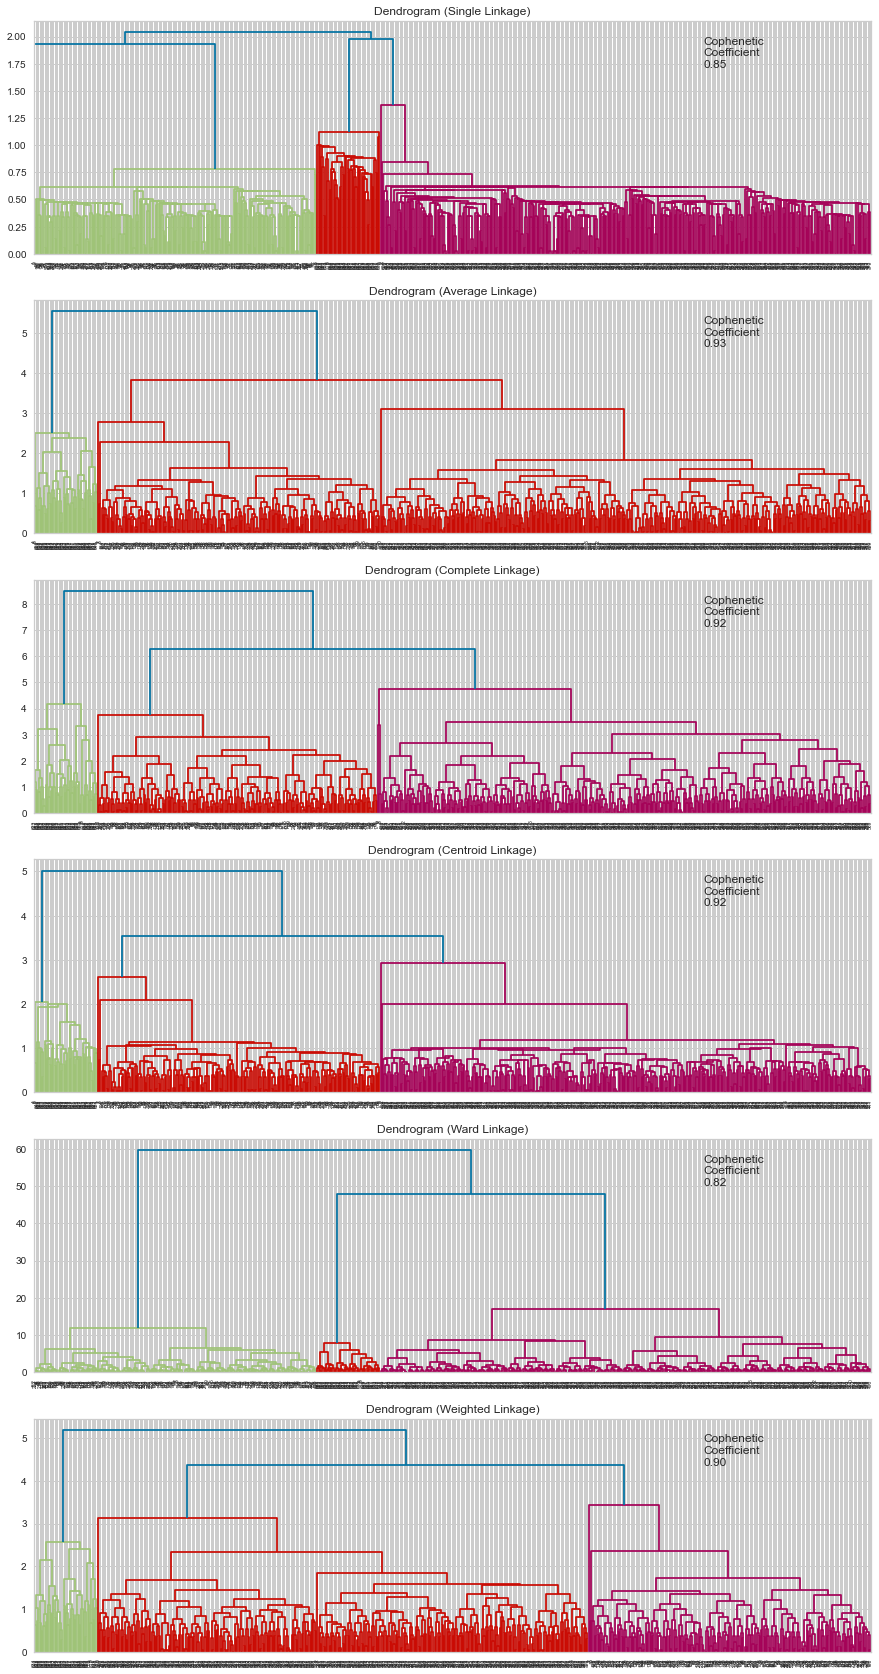

In [66]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(subset_scaled_df, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

**Observations**
- Out of all the dendrogram, it is clear that dendrogram with Average linkage method (93%) gave separate and distinct clusters
- 3 cluster would be appropriate number of cluster from dendrogram with Average linkage method  

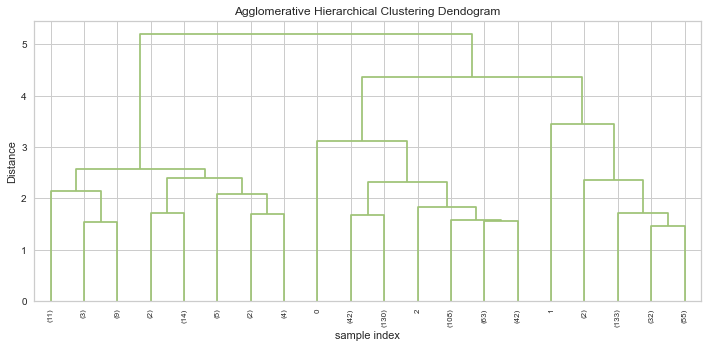

In [67]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, p=20,truncate_mode='lastp' ,leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### Let us create 3 clusters

In [108]:
#Using K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='average')
HCmodel.fit(subset_scaled_df)
subset_scaled_df['HC_Clusters'] = HCmodel.labels_

In [109]:
df['HC_Clusters'] = HCmodel.labels_

In [110]:
cluster_profile = df.groupby('HC_Clusters').mean()

In [111]:
cluster_profile['count_in_each_segments'] = df.groupby('HC_Clusters')['Total_Credit_Cards'].count().values

In [112]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,
0,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,0,386
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,2,50
2,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,1,224


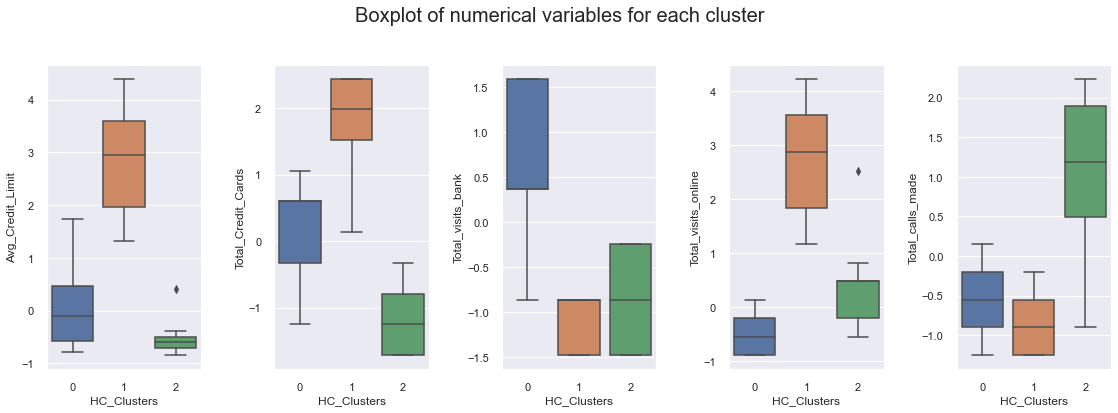

In [114]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=subset_scaled_df[subset_all_col[counter]],x=subset_scaled_df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

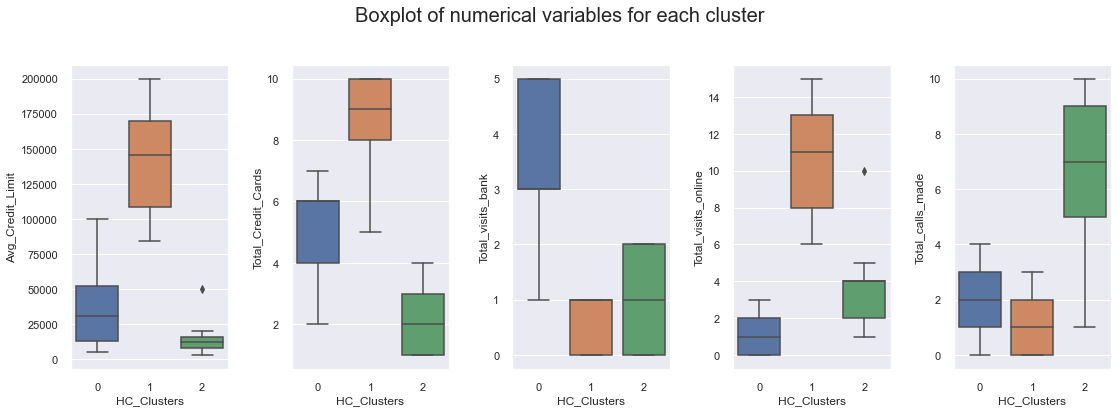

In [115]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[subset_all_col[counter]],x=df['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### Insights
- **Cluster 0**:
    - This cluster contains  mostly customers  with avg credit limit that ranges from 12500 to about 50000 with a median of about 30000 avg credit limit
    - Customers in this cluster mostly have 4-6  total credit cards.
    - This cluster has the highest proportion of customers that visit the bank most, ranging from 3-5 visits.
    - This cluster has customers with the lowest bank visit online.
    - This cluster has moderate proportion of customers that made calls to the bank with a median of 2 .
    
- **Cluster 1**:
    - This cluster contains customers of the highest avg credit limit with a median of about 140000.
    - This cluster has the highest number of customers with credit cards that range from 8- 10 credit cards.
    - This cluster has the lowest bulk of customers that visited the bank with the maximum of 1.
    - This cluster has highest percentage of customers that  visit the bank online with a median of 11.
    - This cluster has lowest proportion of customers that made calls to the bank with a median of 1 .
    
- **Cluster 2**:
    - This cluster has customers with lowest avg credit limit with a median of about 12500
    - The cluster has Customers with the lowest credit cards with a median of 2 credit cards.
    - This cluster has customers that visited the bank with median of 1.
    - This cluster has the moderate percentage of customers that ranges mostly from 2-4 bank visits online.
    - This cluster has highest proportion of customers that made calls to the bank with a median of 7 .

#### Comparing cluster K-means clusters and Hierarchical clusters 
- Cluster 2 from K-Means and Cluster 1 from Hierarchical has the Highest Avg_Credit_Limit.
- Cluster 2 from K-Means and Cluster 1 from Hierarchical has the Highest number of total credit cards.
- Cluster 0 from K-Means and Cluster 0 from Hierarchical has the Highest number of total bank visit.
- Cluster 2 from K-Means and Cluster 1 from Hierarchical has the Highest number of total bank visit online.
- Cluster 1 from K-Means and Cluster 2 from Hierarchical has the Highest number of total call made.

#### Business Recommendations

- As cluster 0 from both techniques suggest customers with Highest number of total bank visit, the bank should encourage customers to visit the bank more online to reduce bank traffic.
- Cluster 2 from K-Means and Cluster 1 from Hierarchical are both same or similar in terms of highest number of both Avg_Credit_Limit and Highest number of total credit cards, so the bank should target customers from these clusters to increase their credit limit and have more credit cards .